<a href="https://colab.research.google.com/github/ddiramisoo1230/NLP_2025/blob/main/11_2_textscraping_saving_converting_ld_fre_sentanalysis_semanticsimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red'> 🐹 👀 🐾 **Text/Content/Web Scraping without HTML tags**

## **API-based Data Collection**

### <font color = 'blue'> **cf., Crawling (a.k.a. HTML Scraping) or Text Mining**

In [ ]:
pip install requests

##🐣 **Defining a function for text scraping**

In [ ]:
import requests #Import the requests library to make HTTP requests.

def get_wikipedia_page(title):                   #Define a function
    URL = "https://en.wikipedia.org/w/api.php"  #Set the API(application program interface) endpoint URL: https://en.wikipedia.org/w/api.php.

    PARAMS = {                                  #Build PARAMS (query parameters) for the API request:
        "action": "query",                      #ask the API to run a query
        "format": "json",                       #request a JSON response
        "prop": "extracts",                     #ask for the page extract (clean text summary)
        "titles": title,                        #specify which page to fetch (by title)
        "explaintext": 1                        #return plain text (no HTML/markup)

    }

    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 " #header to mimic a normal browser request (helps avoid blocks)
                      "(KHTML, like Gecko) Chrome/123.0 Safari/537.36"
    }

    response = requests.get(URL, params=PARAMS, headers=headers)           #Send a GET request to the API with requests

    if response.status_code != 200:                                        #Check the HTTP status code: If not 200 OK, print an error message and return None.
        print("HTTP error:", response.status_code)
        return None

    try:
        data = response.json()                                            #Try to parse the response body as JSON with response.json():
    except:
        print("JSON decode error")                                        #If JSON decoding fails, print a debug message showing the start of the raw response and return None.
        print("Raw response:", response.text[:500])
        return None

    pages = data.get("query", {}).get("pages", {})                      #Navigate the JSON structure to the page data: data["query"]["pages"] (a dictionary keyed by numeric page id).
    page = next(iter(pages.values()))                                   #Extract the single page object with next(iter(pages.values())) (handles the unknown page id).
    return page.get("extract", "")                                      #Return the page’s plain-text extract via page.get("extract", "").
                                                                        #If the page exists, this is the article text; if not, it returns an empty string (or None earlier if errors occurred).

##🐹🐾 **Install NLTK and Download necessary models**

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

###🐹🐾 **1️⃣ Pandas Library**

In [ ]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd #Import Pandas Package
import lexical_diversity as ld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 2.2 MB/s eta 0:00:00


# 🅰️ **Group1**

## ✅ **Text scraping for Group1**

In [ ]:
titles = [
    "Marine life",
    "Marine geology",
    "Bathymetry",
    "Marine ecosystem"
]

corpus = {}

for t in titles:
    txt = get_wikipedia_page(t)
    if txt:
        corpus[t] = txt
    else:
        print("Failed:", t)

# Show first 200 chars for each
for title, text in corpus.items():
    print("\n====", title, "====")
    print(text[:200])


==== Marine life ====
Marine life, sea life or ocean life is the collective ecological communities that encompass all aquatic animals, plants, algae, fungi, protists, single-celled microorganisms and associated viruses liv

==== Marine geology ====
Marine geology or geological oceanography is the study of the history and structure of the ocean floor. It involves geophysical, geochemical, sedimentological and paleontological investigations of the

==== Bathymetry ====
Bathymetry [bəˈθɪmətɹi] is the study of underwater depth of ocean floors (seabed topography), river floors, or lake floors. In other words, bathymetry is the underwater equivalent to hypsometry or top

==== Marine ecosystem ====
Marine ecosystems are the largest of Earth's aquatic ecosystems and exist in waters that have a high salt content. These systems contrast with freshwater ecosystems, which have a lower salt content. M


##🐹 🐾 📌 **Use this!!!**📌
###⭕ <font color = 'green'> **Script for [Group1] — Create one Txt file with records separated by @@@@@**

In [ ]:
output = []

for title in titles:
    txt = get_wikipedia_page(title)
    if not txt:
        txt = ""   # store empty if missing
    block = f"@@@@@\nTITLE: {title}\n{txt}\n"
    output.append(block)

final = "\n".join(output)

with open("wiki_corpus_delimited_group1.txt", "w", encoding="utf-8") as f:
    f.write(final)

print("Saved: wiki_corpus_delimited_group1.txt")

Saved: wiki_corpus_delimited_group1.txt


####✅ **Alternative Script for [Group1] — Create one CSV with two columns (title + text)**

In [ ]:
import csv

rows = []

for title in titles:
    txt = get_wikipedia_page(title)
    rows.append([title, txt])

with open("wiki_corpus_delimited_group1.csv", "w", encoding="utf-8", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["title", "text"])
    writer.writerows(rows)

print("Saved: wiki_corpus_delimited_group1.csv")

Saved: wiki_corpus_delimited_group1.csv


# 🐹🐾 **Read the txt file**
###🐣 **Open and read the text file for Group1**

In [ ]:
# ▶️ Step 1: You need to modify this codeline 🍎🍎🍎🍎🍎
file = open("/content/wiki_corpus_delimited_group1.txt", 'rt')

txt = file.read()
print(txt)
file.close() #Using this close()function, you are no longer using your text file of the current workingdirectory with open()function.

@@@@@
TITLE: Marine life
Marine life, sea life or ocean life is the collective ecological communities that encompass all aquatic animals, plants, algae, fungi, protists, single-celled microorganisms and associated viruses living in the saline water of marine habitats, either the sea water of marginal seas and oceans, or the brackish water of coastal wetlands, lagoons, estuaries and inland seas. As of 2023, more than 242,000 marine species have been documented, and perhaps two million marine species are yet to be documented. An average of 2,332 new species per year are being described. Marine life is studied scientifically in both marine biology and in biological oceanography.
By volume, oceans provide about 90% of the living space on Earth, and served as the cradle of life and vital biotic sanctuaries throughout Earth's geological history. The earliest known life forms evolved as anaerobic prokaryotes (archaea and bacteria) in the Archean oceans around the deep sea hydrothermal vents, 

##🐹🐾 ❄️ **Basic Cleaning**
###**📍Apply a series of functions for replacement in Group1**

In [ ]:
import re

# Step 1: Read file to change path as needed 🍎🍎🍎🍎🍎🍎
with open("/content/wiki_corpus_delimited_group1.txt", 'rt') as fl:
    raw_text = fl.read()

# STEP 2: Clean the text
clean_text = (
    raw_text
    .replace("\n", " ")
    .replace("“", "")
    .replace("”", "")
    .replace("\"", "")
    .replace("/", "")
    .replace("_", "")
    .replace("===", "")
    .replace("==", "")
    .replace("=", "")
    .replace("*", "")
    .replace("?", "")
    .replace("!", "")
    .replace("--", " ")
    .replace("(", "")
    .replace(")", "")
)

# STEP 3: Save the cleaned content to a NEW file as you designate the output path 🍏🍏🍏🍏🍏🍏
output_path = "/content/wiki_corpus_delimited_group1_CLEANED.txt"
with open(output_path, 'w') as cf:
    cf.write(clean_text) #Get content named 'clean_text' to the new empty file

# Optional: Print to verify
print("✅ Cleaned text saved to:", output_path)

✅ Cleaned text saved to: /content/wiki_corpus_delimited_group1_CLEANED.txt


###🐹🐣🐣🐣**Download and edit two txt files so that it has headers delimited by @, and upload it under [Wikipedia] Foldr of your github account!**

##✅ ✅**Text scraping for Group2**

In [ ]:
titles = [
    "Astronomy",
    "Planetary science",
    "Space physics",
    "Astrobiology"
]

corpus = {}

for t in titles:
    txt = get_wikipedia_page(t)
    if txt:
        corpus[t] = txt
    else:
        print("Failed:", t)

# Show first 200 chars for each
for title, text in corpus.items():
    print("\n====", title, "====")
    print(text[:200])


==== Astronomy ====
Astronomy is a natural science that studies celestial objects and the phenomena that occur in the cosmos. It uses mathematics, physics, and chemistry to explain their origin and their overall evolutio

==== Planetary science ====
Planetary science (or more rarely, planetology) is the scientific study of planets (including Earth), celestial bodies (such as moons, asteroids, comets) and planetary systems (in particular those of 

==== Space physics ====
Space physics, also known as space plasma physics, is the study of naturally occurring plasmas within Earth's upper atmosphere and the rest of the Solar System. It includes the topics of aeronomy, aur

==== Astrobiology ====
Astrobiology (also xenology or exobiology) is a scientific field within the life and environmental sciences that studies the origins, early evolution, distribution, and future of life in the universe 


##⭕⭕ <font color = 'blue'> **Script for [Group2] — Create one Txt file with records separated by @@@@@**

In [ ]:
output = []

for title in titles:
    txt = get_wikipedia_page(title)
    if not txt:
        txt = ""   # store empty if missing
    block = f"@@@@@\nTITLE: {title}\n{txt}\n"
    output.append(block)

final = "\n".join(output)

with open("wiki_corpus_delimited_group2.txt", "w", encoding="utf-8") as f:
    f.write(final)

print("Saved: wiki_corpus_delimited_group2.txt")

Saved: wiki_corpus_delimited_group2.txt


###🐣🐣 **Open and read the text file for Group2**

In [ ]:
# ▶️ Step 1: You need to modify this codeline 🍎🍎🍎🍎🍎
file = open("/content/wiki_corpus_delimited_group2.txt", 'rt')

txt = file.read()
print(txt)
file.close() #Using this close()function, you are no longer using your text file of the current workingdirectory with open()function.

@@@@@
TITLE: Astronomy
Astronomy is a natural science that studies celestial objects and the phenomena that occur in the cosmos. It uses mathematics, physics, and chemistry to explain their origin and their overall evolution. Objects of interest include planets, moons, stars, nebulae, galaxies, meteoroids, asteroids, and comets. Relevant phenomena include supernova explosions, gamma ray bursts, quasars, blazars, pulsars, and cosmic microwave background radiation. More generally, astronomy studies everything that originates beyond Earth's atmosphere. Cosmology is the branch of astronomy that studies the universe as a whole.
Astronomy is one of the oldest natural sciences. The early civilizations in recorded history made methodical observations of the night sky. These include the Egyptians, Babylonians, Greeks, Indians, Chinese, Maya, and many ancient indigenous peoples of the Americas. In the past, astronomy included disciplines as diverse as astrometry, celestial navigation, observatio

##**📍📍Apply a series of functions for replacement in Group2**

In [ ]:
import re

# Step 1: Read file to change path as needed 🍎🍎🍎🍎🍎🍎
with open("/content/wiki_corpus_delimited_group2.txt", 'rt') as fl:
    raw_text = fl.read()

# STEP 2: Clean the text
clean_text = (
    raw_text
    .replace("\n", " ")
    .replace("“", "")
    .replace("”", "")
    .replace("\"", "")
    .replace("/", "")
    .replace("_", "")
    .replace("===", "")
    .replace("==", "")
    .replace("=", "")
    .replace("*", "")
    .replace("?", "")
    .replace("!", "")
    .replace("--", " ")
    .replace("(", "")
    .replace(")", "")
)

# STEP 3: Save the cleaned content to a NEW file as you designate the output path 🍏🍏🍏🍏🍏🍏
output_path = "/content/wiki_corpus_delimited_group2_CLEANED.txt"
with open(output_path, 'w') as cf:
    cf.write(clean_text) #Get content named 'clean_text' to the new empty file

# Optional: Print to verify
print("✅ Cleaned text saved to:", output_path)

✅ Cleaned text saved to: /content/wiki_corpus_delimited_group2_CLEANED.txt


###🐹🐣🐣🐣**Download and edit two txt files so that it has headers delimited by @, and upload it under [Wikipedia] Foldr of your github account!**

###🐹🐣**Clone your github repository of your interest**

In [ ]:
!git clone https://github.com/eunoiabout/NLP_2025

Cloning into 'NLP_2025'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.57 MiB | 9.71 MiB/s, done.
Resolving deltas: 100% (2/2), done.


###🍄🍄 **If you need to remove the repository you've just cloned, run the following code cell if necessary.**

- <font color = 'red'> **_import shutil_**

- <font color = 'red'> **_shutil.rmtree('/CurrentDirectoryPath')_**

In [ ]:
#@markdown <font color = 'purple'> Run this cell if needed...
import shutil
shutil.rmtree('/content/NLP_2025')

In [ ]:
#Reset your current directory after you remove your directory manually (e.g., shutil.rmtree())
import os
os.chdir('/')
os.chdir('/content')

!git clone https://github.com/eunoiabout/NLP_2025

fatal: destination path 'NLP_2025' already exists and is not an empty directory.


#💊 3️⃣ <font color = 'green'> **Avoid overlapping indecies**

In [ ]:
# df1을 최종 CSV로 저장 (기존 파일 덮어쓰기)
output_path = "/content/NLP_2025/Wikipedia/wiki_group1_group2.csv"
df1.to_csv(output_path, index=False, encoding="utf-8")

print("CSV 저장 완료:", output_path)
print(df1.head())

CSV 저장 완료: /content/NLP_2025/Wikipedia/wiki_group1_group2.csv
        Title                                               Text   Group  \
0      Marine  life Marine life, sea life or ocean life is th...  group1   
1      Marine  geology Marine geology or geological oceanogra...  group1   
2  Bathymetry  Bathymetry [bəˈθɪmətɹi] is the study of underw...  group1   
3      Marine  ecosystem Marine ecosystems are the largest of...  group1   
4   Astronomy  Astronomy is a natural science that studies ce...  group2   

   Data size                                             Splits  N_Splits  \
0      93005  [life, Marine, life,, sea, life, or, ocean, li...     14343   
1      22680  [geology, Marine, geology, or, geological, oce...      3503   
2      18328  [Bathymetry, [bəˈθɪmətɹi], is, the, study, of,...      2783   
3      20888  [ecosystem, Marine, ecosystems, are, the, larg...      3123   
4      29474  [Astronomy, is, a, natural, science, that, stu...      4373   

                  

In [ ]:
file_path = '/content/NLP_2025/Wikipedia/wiki_group1_group2.csv'
df2 = pd.read_csv(file_path)
df2.head()


,Title,Text,Group,Data size,Splits,N_Splits,Lemma,N_Sents
0,Marine,"life Marine life, sea life or ocean life is th...",group1,93005,"['life', 'Marine', 'life,', 'sea', 'life', 'or...",14343,"['life', 'marine', 'life', 'sea', 'life', 'or'...",756
1,Marine,geology Marine geology or geological oceanogra...,group1,22680,"['geology', 'Marine', 'geology', 'or', 'geolog...",3503,"['geology', 'marine', 'geology', 'or', 'geolog...",177
2,Bathymetry,Bathymetry [bəˈθɪmətɹi] is the study of underw...,group1,18328,"['Bathymetry', '[bəˈθɪmətɹi]', 'is', 'the', 's...",2783,"['bathymetry', '[bəˈθɪmətɹi]', 'be', 'the', 's...",120
3,Marine,ecosystem Marine ecosystems are the largest of...,group1,20888,"['ecosystem', 'Marine', 'ecosystems', 'are', '...",3123,"['ecosystem', 'marine', 'ecosystem', 'be', 'th...",146
4,Astronomy,Astronomy is a natural science that studies ce...,group2,29474,"['Astronomy', 'is', 'a', 'natural', 'science',...",4373,"['astronomy', 'be', 'a', 'natural', 'science',...",214


In [ ]:
import pandas as pd
import glob

# Change directory 🍎🍎🍎🍎🍎
%cd /content/NLP_2025/Wikipedia2

# Load all .txt files
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

# Go back to main directory
%cd /content

# Save as CSV
df.to_csv("./wiki_group1_group2.csv", index=False)

# Display the DataFrame
print(df)

### <font color = 'purple'> ➡️ 🐹🐾 **Now download csv file just created, and upload it under Wikipedia folder of NLP repository on your github account.**

# <font color = 'red'> 🐹🐾 **Final Script to prepare input text for further analysis ready(e.g., Number of tokens comparisons, etc.)**

  - # <font color = 'blue'> 🐹🐾 **Important & Useful!**
  - ### **This script will be based on plain text for 10 volumes above.**

In [ ]:
%cd /content/NLP_2025/Wikipedia

/content/NLP_2025/Wikipedia


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Change file path 🍎🍎🍎🍎🍎
file_path1= '/content/wiki_group1_group.csv'

df = pd.read_csv(file_path1)
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/wiki_group1_group.csv'

####🐥 **Adding a colum with length info**

In [ ]:
df1 = df

In [ ]:
print(df1.columns)
df1.head()

In [ ]:
# 1 Unnamed가 아닌 실제 텍스트 컬럼 이름을 하나 찾는다.
real_text_col = [c for c in df1.columns if not c.startswith('Unnamed')][0]
print('실제 텍스트 컬럼 이름:', real_text_col)

# 2 그 컬럼을 스크립트가 기대하는 이름 'text'로 바꾼다.
df1.rename(columns={real_text_col: 'text'}, inplace=True)

실제 텍스트 컬럼 이름:  TITLE: Marine life Marine life, sea life or ocean life is the collective ecological communities that encompass all aquatic animals, plants, algae, fungi, protists, single-celled microorganisms and associated viruses living in the saline water of marine habitats, either the sea water of marginal seas and oceans, or the brackish water of coastal wetlands, lagoons, estuaries and inland seas. As of 2023, more than 242,000 marine species have been documented, and perhaps two million marine species are yet to be documented. An average of 2,332 new species per year are being described. Marine life is studied scientifically in both marine biology and in biological oceanography. By volume, oceans provide about 90% of the living space on Earth, and served as the cradle of life and vital biotic sanctuaries throughout Earth's geological history. The earliest known life forms evolved as anaerobic prokaryotes archaea and bacteria in the Archean oceans around the deep sea hydrothermal 

In [ ]:
import re
def parse_delimited_text_file(file_path, group_name):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()


    blocks = re.split(r'@@@@@', content)

    data = []
    for block in blocks:
        if 'TITLE:' in block:

            parts = block.split('TITLE:', 1)
            if len(parts) > 1:
                title_and_text = parts[1].strip()
                title_match = re.match(r'\s*([a-zA-Z0-9\s]+?)\s+(.*)', title_and_text, re.DOTALL)

                if title_match:
                    title = title_match.group(1).strip()
                    text = title_match.group(2).strip()
                else:
                    title_lines = title_and_text.split('  ', 1)
                    title = title_lines[0].strip()
                    text = title_lines[1].strip() if len(title_lines) > 1 else ''

                data.append({'Title': title, 'Text': text, 'Group': group_name})
    return pd.DataFrame(data)

df_group1_clean = parse_delimited_text_file(
    '/content/wiki_corpus_delimited_group1_CLEANED.txt', 'Group1'
)
df_group2_clean = parse_delimited_text_file(
    '/content/wiki_corpus_delimited_group2_CLEANED.txt', 'Group2'
)

df1 = pd.concat([df_group1_clean, df_group2_clean], ignore_index=True)

df1['Text'] = df1['Text'].astype(str).fillna('')
length = []

for i in range(0, len(df1['Text'])):
  LEN = len(df1['Text'][i])
  length.append(LEN)

df1['Data size'] = length
df1

,Title,Text,Group,Data size
0,Marine,"life Marine life, sea life or ocean life is th...",Group1,93005
1,Marine,geology Marine geology or geological oceanogra...,Group1,22680
2,Bathymetry,Bathymetry [bəˈθɪmətɹi] is the study of underw...,Group1,18328
3,Marine,ecosystem Marine ecosystems are the largest of...,Group1,20888
4,Astronomy,Astronomy is a natural science that studies ce...,Group2,29474
5,Planetary,"science Planetary science or more rarely, plan...",Group2,18861
6,Space,"physics Space physics, also known as space pla...",Group2,5025
7,Astrobiology,Astrobiology also xenology or exobiology is a ...,Group2,47480


In [ ]:
# df1을 최종 CSV로 저장 (기존 파일 완전히 덮어쓰기)
output_path = "/content/NLP_2025/Wikipedia/wiki_group1_group2.csv"
df1.to_csv(output_path, index=False, encoding="utf-8")

print("CSV 저장 완료:", output_path)
print(df1.shape)


CSV 저장 완료: /content/NLP_2025/Wikipedia/wiki_group1_group2.csv
(8, 4)


In [ ]:
!head -5 /content/NLP_2025/Wikipedia/wiki_group1_group2.csv


Title,Text,Group,Data size
Marine,"life Marine life, sea life or ocean life is the collective ecological communities that encompass all aquatic animals, plants, algae, fungi, protists, single-celled microorganisms and associated viruses living in the saline water of marine habitats, either the sea water of marginal seas and oceans, or the brackish water of coastal wetlands, lagoons, estuaries and inland seas. As of 2023, more than 242,000 marine species have been documented, and perhaps two million marine species are yet to be documented. An average of 2,332 new species per year are being described. Marine life is studied scientifically in both marine biology and in biological oceanography. By volume, oceans provide about 90% of the living space on Earth, and served as the cradle of life and vital biotic sanctuaries throughout Earth's geological history. The earliest known life forms evolved as anaerobic prokaryotes archaea and bacteria in the Archean oceans around the deep sea hydroth

In [ ]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df1['Text'])):
  TSP = df1['Text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df1['Splits'] = tsplit
df1['N_Splits'] = splen
df1

,Title,Text,Group,Data size,Splits,N_Splits
0,Marine,"life Marine life, sea life or ocean life is th...",Group1,93005,"[life, Marine, life,, sea, life, or, ocean, li...",14343
1,Marine,geology Marine geology or geological oceanogra...,Group1,22680,"[geology, Marine, geology, or, geological, oce...",3503
2,Bathymetry,Bathymetry [bəˈθɪmətɹi] is the study of underw...,Group1,18328,"[Bathymetry, [bəˈθɪmətɹi], is, the, study, of,...",2783
3,Marine,ecosystem Marine ecosystems are the largest of...,Group1,20888,"[ecosystem, Marine, ecosystems, are, the, larg...",3123
4,Astronomy,Astronomy is a natural science that studies ce...,Group2,29474,"[Astronomy, is, a, natural, science, that, stu...",4373
5,Planetary,"science Planetary science or more rarely, plan...",Group2,18861,"[science, Planetary, science, or, more, rarely...",2772
6,Space,"physics Space physics, also known as space pla...",Group2,5025,"[physics, Space, physics,, also, known, as, sp...",748
7,Astrobiology,Astrobiology also xenology or exobiology is a ...,Group2,47480,"[Astrobiology, also, xenology, or, exobiology,...",7004


In [ ]:
df1.describe()

,Data size,N_Splits
count,8.000000,8.000000
mean,31967.625000,4831.125000
std,27425.637614,4229.072152
min,5025.000000,748.000000
25%,18727.750000,2780.250000
50%,21784.000000,3313.000000
75%,33975.500000,5030.750000
max,93005.000000,14343.000000


Lexical Diversity Indices (10 types)

#Result file

In [ ]:
df1.describe()

,Data size,N_Splits
count,8.000000,8.000000
mean,31967.625000,4831.125000
std,27425.637614,4229.072152
min,5025.000000,748.000000
25%,18727.750000,2780.250000
50%,21784.000000,3313.000000
75%,33975.500000,5030.750000
max,93005.000000,14343.000000


In [ ]:
#Getting LD indices
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

In [ ]:
# Added column: String length
lem = []

for i in range(0, len(df1['Text'])):
  LEM = ld.flemmatize(df1['Text'][i])
  print(LEM)
  lem.append(LEM)

df1['Lemma'] = lem

['life', 'marine', 'life', 'sea', 'life', 'or', 'ocean', 'life', 'be', 'the', 'collective', 'ecological', 'community', 'that', 'encompass', 'all', 'aquatic', 'animal', 'plant', 'algae', 'fungus', 'protists', 'singlecelled', 'microorganisms', 'and', 'associate', 'virus', 'living', 'in', 'the', 'saline', 'water', 'of', 'marine', 'habitat', 'either', 'the', 'sea', 'water', 'of', 'marginal', 'sea', 'and', 'ocean', 'or', 'the', 'brackish', 'water', 'of', 'coastal', 'wetlands', 'lagoon', 'estuary', 'and', 'inland', 'sea', 'as', 'of', '2023', 'more', 'than', '242000', 'marine', 'species', 'have', 'be', 'document', 'and', 'perhaps', 'two', 'million', 'marine', 'species', 'be', 'yet', 'to', 'be', 'document', 'a', 'average', 'of', '2332', 'new', 'species', 'per', 'year', 'be', 'being', 'describe', 'marine', 'life', 'be', 'study', 'scientifically', 'in', 'both', 'marine', 'biology', 'and', 'in', 'biological', 'oceanography', 'by', 'volume', 'ocean', 'provide', 'about', '90', 'of', 'the', 'living'

In [ ]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

#**N of sentences**

In [ ]:
!pip install textstat
import textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.1 MB/s eta 0:00:00


In [ ]:
df1['N_Sents'] = df1['Text'].apply(textstat.sentence_count)
df1.to_csv('LD_result_with_Nsents.csv')

#Plotting

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

Group
group1    4
group2    4
Name: count, dtype: int64


/tmp/ipython-input-2709911147.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group', y='N_Splits', data=dd, palette="Accent")


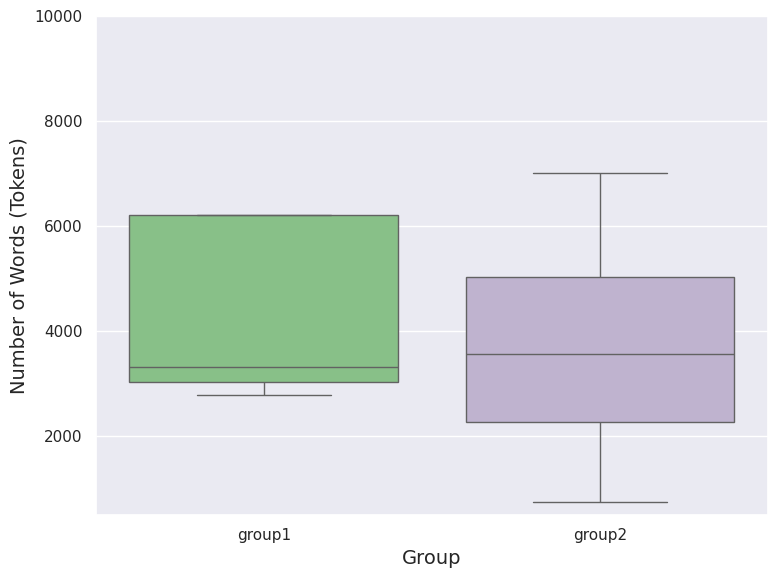

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#🍎🍎🍎🍎🍎 'Group'
# Normalize category labels (critical step)
df1['Group'] = df1['Group'].str.strip().str.lower()

# Check the unique values (optional debug)
print(df1['Group'].value_counts())

# Set theme and size
sns.set_theme(style='white')
sns.set(rc={'figure.figsize':(8,6),"font.size":14,"axes.titlesize":18,"axes.labelsize":14})

# Prepare the data
dd = df1[['Group', 'N_Splits']].copy()

# Draw the boxplot (1 box per category)
ax = sns.boxplot(x='Group', y='N_Splits', data=dd, palette="Accent")
ax.set_ylim([500, 10000]) #🍎🍎🍎🍎🍎 adjust second element(e.g.,1000) if necessary!
ax.set(xlabel='Group', ylabel='Number of Words (Tokens)')

# Save the figure
plt.tight_layout()
plt.savefig('boxplot_Nsplit.png')
plt.show()

# <font color = 'red'> 🐹🐾 **Final Script to prepare input text for further analysis (e.g., Lexical Diversity, Flesch-KinKeid Grade Level Indices, Sentiment analysis, Semantic similarityetc.)**

  - # <font color = 'blue'> 🐹🐾 **Important & Useful!**
  - ### **This script will be based on plain text for 8 articles above.**

  # <font color = 'blue'> 🐣🐣🐣🐣🐣 **Make sure that your CSV file under your Wikipedia folder!**

In [ ]:
%cd /content/NLP_2025/Wikipedia

/content/NLP_2025/Wikipedia


In [ ]:
%cd /content

# 이미 만든 NLP_2025 폴더 지우고
!rm -rf NLP_2025

# GitHub 리포를 통째로 클론
!git clone https://github.com/eunoiabout/NLP_2025.git

# 이제 /content/NLP_2025/Wikipedia 가 생김
%cd /content/NLP_2025/Wikipedia
!ls


/content
Cloning into 'NLP_2025'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 1.74 MiB | 10.23 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/NLP_2025/Wikipedia
dummy
wiki_corpus_delimited_group1_CLEANED.txt
wiki_corpus_delimited_group2_CLEANED.txt
wiki_group1_group2.csv


In [ ]:
file_path = '/content/NLP_2025/Wikipedia/wiki_group1_group2.csv'

df2 = pd.read_csv(file_path)

# (Optional) 혹시라도 남아 있을 수 있는 Unnamed 인덱스 컬럼 제거
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

print(df2.columns)
df2.head()


Index(['Title', 'Text', 'Group', 'Data size'], dtype='object')


,Title,Text,Group,Data size
0,Marine,"life Marine life, sea life or ocean life is th...",Group1,93005
1,Marine,geology Marine geology or geological oceanogra...,Group1,22680
2,Bathymetry,Bathymetry [bəˈθɪmətɹi] is the study of underw...,Group1,18328
3,Marine,ecosystem Marine ecosystems are the largest of...,Group1,20888
4,Astronomy,Astronomy is a natural science that studies ce...,Group2,29474


In [ ]:
#file_path= '/content/NLP_2025/Wikipedia/wiki_group1_group2.csv'
#df2 = pd.read_csv(file_path)
#df2
#df2 = pd.read_csv(file_path, header=None, names=["Text"])
#df2["Text"] = df2["Text"].astype(str).str.strip()
#df2.head()


In [ ]:
# Added column: String length
length = []

for i in range(0, len(df2['Text'])):
  LEN = len(df2['Text'][i])
  length.append(LEN)

df2['Data size'] = length
df2

,Title,Text,Group,Data size
0,Marine,"life Marine life, sea life or ocean life is th...",Group1,93005
1,Marine,geology Marine geology or geological oceanogra...,Group1,22680
2,Bathymetry,Bathymetry [bəˈθɪmətɹi] is the study of underw...,Group1,18328
3,Marine,ecosystem Marine ecosystems are the largest of...,Group1,20888
4,Astronomy,Astronomy is a natural science that studies ce...,Group2,29474
5,Planetary,"science Planetary science or more rarely, plan...",Group2,18861
6,Space,"physics Space physics, also known as space pla...",Group2,5025
7,Astrobiology,Astrobiology also xenology or exobiology is a ...,Group2,47480


In [ ]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['Text'])):
  TSP = df2['Text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Splits'] = splen
df2

,Title,Text,Group,Data size,Splits,N_Splits
0,Marine,"life Marine life, sea life or ocean life is th...",Group1,93005,"[life, Marine, life,, sea, life, or, ocean, li...",14343
1,Marine,geology Marine geology or geological oceanogra...,Group1,22680,"[geology, Marine, geology, or, geological, oce...",3503
2,Bathymetry,Bathymetry [bəˈθɪmətɹi] is the study of underw...,Group1,18328,"[Bathymetry, [bəˈθɪmətɹi], is, the, study, of,...",2783
3,Marine,ecosystem Marine ecosystems are the largest of...,Group1,20888,"[ecosystem, Marine, ecosystems, are, the, larg...",3123
4,Astronomy,Astronomy is a natural science that studies ce...,Group2,29474,"[Astronomy, is, a, natural, science, that, stu...",4373
5,Planetary,"science Planetary science or more rarely, plan...",Group2,18861,"[science, Planetary, science, or, more, rarely...",2772
6,Space,"physics Space physics, also known as space pla...",Group2,5025,"[physics, Space, physics,, also, known, as, sp...",748
7,Astrobiology,Astrobiology also xenology or exobiology is a ...,Group2,47480,"[Astrobiology, also, xenology, or, exobiology,...",7004


In [ ]:
df2.describe()

,Data size,N_Splits
count,8.000000,8.000000
mean,31967.625000,4831.125000
std,27425.637614,4229.072152
min,5025.000000,748.000000
25%,18727.750000,2780.250000
50%,21784.000000,3313.000000
75%,33975.500000,5030.750000
max,93005.000000,14343.000000


# **Lexical Diversity Indices (10 types)**

**Getting LD indices**

In [ ]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

In [ ]:
# Added column: String length
lem = []

for i in range(0, len(df2['Text'])):
  LEM = ld.flemmatize(df2['Text'][i])
  print(LEM)
  lem.append(LEM)

df2['Lemma'] = lem

['life', 'marine', 'life', 'sea', 'life', 'or', 'ocean', 'life', 'be', 'the', 'collective', 'ecological', 'community', 'that', 'encompass', 'all', 'aquatic', 'animal', 'plant', 'algae', 'fungus', 'protists', 'singlecelled', 'microorganisms', 'and', 'associate', 'virus', 'living', 'in', 'the', 'saline', 'water', 'of', 'marine', 'habitat', 'either', 'the', 'sea', 'water', 'of', 'marginal', 'sea', 'and', 'ocean', 'or', 'the', 'brackish', 'water', 'of', 'coastal', 'wetlands', 'lagoon', 'estuary', 'and', 'inland', 'sea', 'as', 'of', '2023', 'more', 'than', '242000', 'marine', 'species', 'have', 'be', 'document', 'and', 'perhaps', 'two', 'million', 'marine', 'species', 'be', 'yet', 'to', 'be', 'document', 'a', 'average', 'of', '2332', 'new', 'species', 'per', 'year', 'be', 'being', 'describe', 'marine', 'life', 'be', 'study', 'scientifically', 'in', 'both', 'marine', 'biology', 'and', 'in', 'biological', 'oceanography', 'by', 'volume', 'ocean', 'provide', 'about', '90', 'of', 'the', 'living'

In [ ]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  mass = ld.maas_ttr(flt)
  msttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  mtld_wrap = ld.mtld_ma_wrap(flt)
  mtld_bid = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MassTTR.append(mass)
  MSTTR.append(msttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  MTLD_wrap.append(mtld_wrap)
  MTLD_bid.append(mtld_bid)

# Add columns
df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MassTTR'] = MassTTR
df2['MSTTR'] = MSTTR
df2['MATTR'] = MATTR
df2['HDD'] = HDD
df2['MTLD'] = MTLD
df2['MTLD_wrap'] = MTLD_wrap
df2['MTLD_bid'] = MTLD_bid

In [ ]:
!pip install textstat
import textstat

In [ ]:
df2['N_Sents'] = df2['Text'].apply(textstat.sentence_count)
df2.to_csv('LD_result_with_Nsents.csv')

In [ ]:
df2.describe()

,Data size,N_Splits,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid,N_Sents
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,31967.625000,4831.125000,0.293910,17.148373,0.847783,0.042704,0.767725,0.770575,0.838803,67.546819,70.371044,69.668950,231.625000
std,27425.637614,4229.072152,0.087673,2.480749,0.020233,0.002076,0.010892,0.009475,0.010832,4.672604,5.356565,5.598133,223.943193
min,5025.000000,748.000000,0.177094,13.098535,0.819126,0.038692,0.753143,0.758737,0.825853,61.704853,62.664502,62.310031,35.000000
25%,18727.750000,2780.250000,0.262224,16.030435,0.839178,0.041614,0.759636,0.765080,0.834028,64.597762,66.105843,65.459145,122.250000
50%,21784.000000,3313.000000,0.284546,16.683484,0.846475,0.043346,0.767299,0.768002,0.835723,65.396299,70.987746,69.760991,161.500000
75%,33975.500000,5030.750000,0.304131,18.658112,0.850526,0.044146,0.778017,0.779568,0.840700,72.184765,73.905014,73.196017,231.000000
max,93005.000000,14343.000000,0.479250,21.204770,0.888826,0.044885,0.781290,0.783788,0.857194,74.057840,78.217168,78.445476,756.000000


##📈 **Plotting**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

Group
group1    4
group2    4
Name: count, dtype: int64


/tmp/ipython-input-456657194.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group', y='N_Splits', data=dd, palette="Accent")


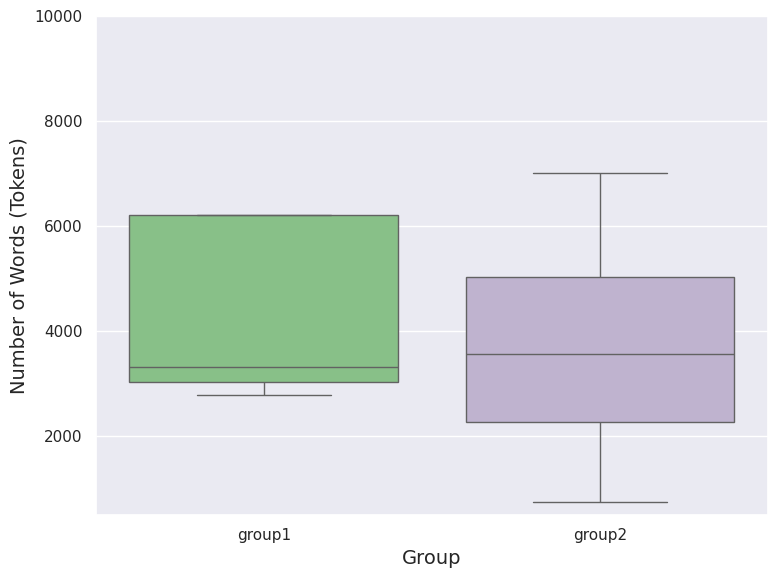

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Normalize category labels (critical step)
df2['Group'] = df2['Group'].str.strip().str.lower()

# Check the unique values (optional debug)
print(df2['Group'].value_counts())

# Set theme and size
sns.set_theme(style='white')
sns.set(rc={'figure.figsize':(8,6),"font.size":14,"axes.titlesize":18,"axes.labelsize":14})

# Prepare the data
dd = df2[['Group', 'N_Splits']].copy()

# Draw the boxplot (1 box per category)
ax = sns.boxplot(x='Group', y='N_Splits', data=dd, palette="Accent")
ax.set_ylim([500, 10000])
ax.set(xlabel='Group', ylabel='Number of Words (Tokens)')

# Save the figure
plt.tight_layout()
plt.savefig('boxplot_Nsplit.png')
plt.show()

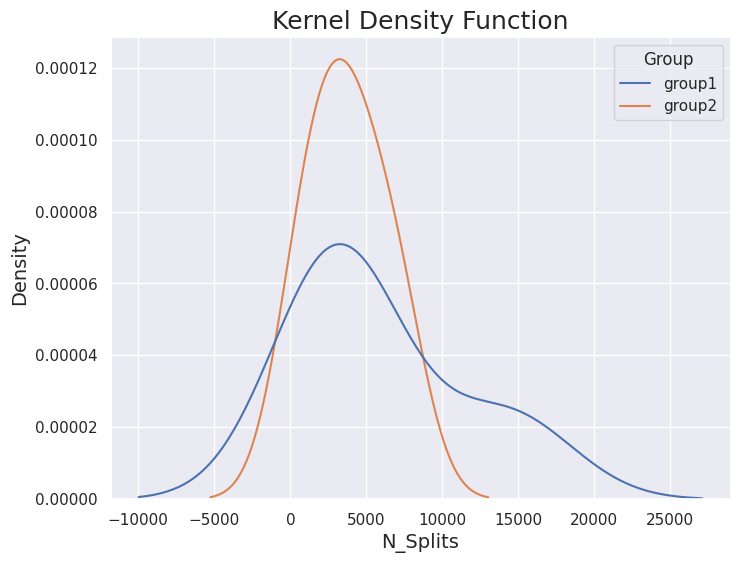

In [ ]:
sns.kdeplot(x='N_Splits', data=df2, hue='Group', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_Nsplit.png')

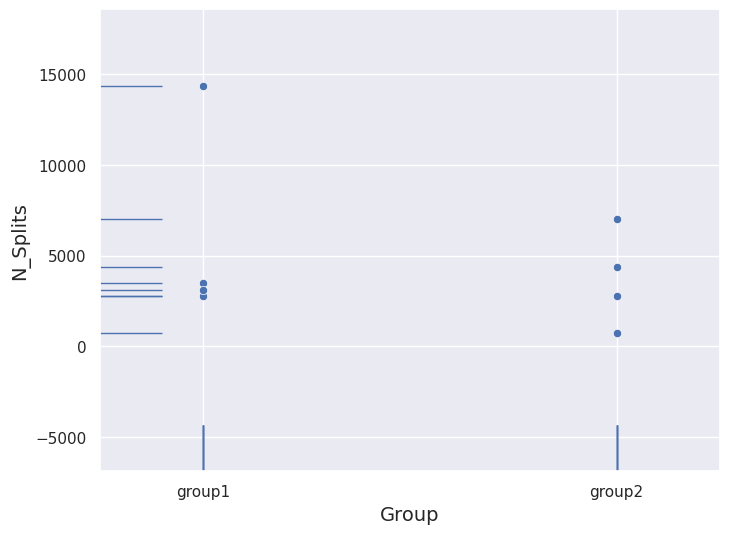

In [ ]:
sns.scatterplot(data=df2, x="Group", y="N_Splits")
sns.rugplot(data=df2, x="Group", y="N_Splits", height=.1)
plt.savefig('Rug_Nsplit.png')

### **Lexical Diversity analysis: select TTR, MassTTR, MTLD, HDD**

In [ ]:
df3 = df2
for col in df3.columns:
    print(col)

Title
Text
Group
Data size
Splits
N_Splits
Lemma
TTR
RTTR
LogTTR
MassTTR
MSTTR
MATTR
HDD
MTLD
MTLD_wrap
MTLD_bid
N_Sents


In [ ]:
df3 = df2[['Group','N_Splits','N_Sents','TTR','MATTR','HDD','MTLD']]
df3.head(15)

,Group,N_Splits,N_Sents,TTR,MATTR,HDD,MTLD
0,group1,14343,756,0.177094,0.779395,0.857194,72.878030
1,group1,3503,177,0.272987,0.759728,0.825853,61.704853
2,group1,2783,120,0.296802,0.767366,0.835534,64.901159
3,group1,3123,146,0.289878,0.783788,0.853476,74.057840
4,group2,4373,214,0.279213,0.766864,0.830965,65.891439
5,group2,2772,123,0.326118,0.758737,0.836441,64.701748
6,group2,748,35,0.479250,0.780086,0.835911,71.953676
7,group2,7004,282,0.229934,0.768638,0.835050,64.285803


In [ ]:
df3.groupby('Group')['TTR'].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
group1,4.0,0.259190,0.055637,0.177094,0.249014,0.281433,0.291609,0.296802
group2,4.0,0.328629,0.107820,0.229934,0.266894,0.302666,0.364401,0.479250


In [ ]:
print(df3.groupby('Group')['TTR'].describe())

        count      mean       std       min       25%       50%       75%  \
Group                                                                       
group1    4.0  0.259190  0.055637  0.177094  0.249014  0.281433  0.291609   
group2    4.0  0.328629  0.107820  0.229934  0.266894  0.302666  0.364401   

             max  
Group             
group1  0.296802  
group2  0.479250  


##**MATTR (Moving average token-to-token ratio)**

In [ ]:
df3.groupby('Group')['MATTR'].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
group1,4.0,0.772569,0.011022,0.759728,0.765457,0.773381,0.780493,0.783788
group2,4.0,0.768581,0.008798,0.758737,0.764832,0.767751,0.771500,0.780086


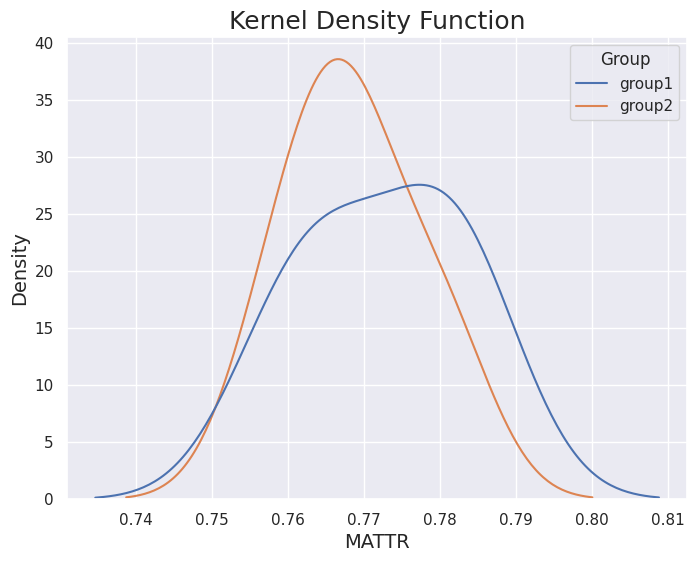

In [ ]:
sns.kdeplot(x='MATTR', data=df3, hue='Group', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_MATTR.png')

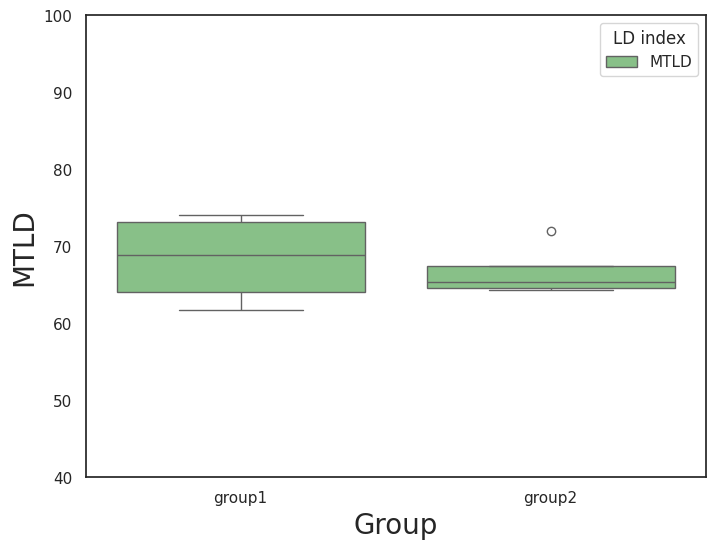

In [ ]:
sns.set(rc={'figure.figsize':(8,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
# sns.set_theme(style='white')
dd=pd.melt(df3,id_vars=['Group'],value_vars=['MTLD'],var_name='LD index')
ax = sns.boxplot(x='Group',y='value',data=dd,hue='LD index',palette="Accent")
ax.set_ylim([40,100])
ax.set(xlabel='Group', ylabel='MTLD')
plt.savefig('boxplot_MTLD_by_group.png')

#📚 📚 **Readability**

###**Install packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

!pip install textstat
import textstat

In [ ]:
from typing import TextIO
FRE = []
FKG = []
GF = []
ARI = []
CLI = []
LWF = []
DCRS = []
TS = []

for i in range(0, len(df2['Text'])):
  text = df2['Text'][i]
  fre = textstat.flesch_reading_ease(text)
  fkg = textstat.flesch_kincaid_grade(text)
  gf = textstat.gunning_fog(text)
  ari = textstat.automated_readability_index(text)
  cli = textstat.coleman_liau_index(text)
  lwf = textstat.linsear_write_formula(text)
  dcrs = textstat.dale_chall_readability_score(text)
  ts = textstat.text_standard(text)

  FRE.append(fre)
  FKG.append(fkg)
  GF.append(gf)
  ARI.append(ari)
  CLI.append(cli)
  LWF.append(lwf)
  DCRS.append(dcrs)
  TS.append(ts)


df3['FRE'] = FRE #Flesch Reading Ease
df3['FKG'] = FKG
df3['GF'] = GF
df3['ARI'] = ARI
df3['CLI'] = CLI
df3['LWF'] = LWF
df3['DCRS'] = DCRS
df3['TS'] = TS


/tmp/ipython-input-2918853722.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['FRE'] = FRE #Flesch Reading Ease
/tmp/ipython-input-2918853722.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['FKG'] = FKG
/tmp/ipython-input-2918853722.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
df3.to_csv('results_wiki_group1_group2.csv')

In [ ]:
df3.head(15)

,Group,N_Splits,N_Sents,TTR,MATTR,HDD,MTLD,FRE,FKG,GF,ARI,CLI,LWF,DCRS,TS
0,group1,14343,756,0.177094,0.779395,0.857194,72.878030,39.154226,12.503441,15.498531,13.768404,13.621985,17.000000,11.483452,13th and 14th grade
1,group1,3503,177,0.272987,0.759728,0.825853,61.704853,37.904094,12.883479,15.772449,14.103042,13.511117,13.333333,11.756130,13th and 14th grade
2,group1,2783,120,0.296802,0.767366,0.835534,64.901159,30.575669,14.729179,17.810951,16.293377,14.606209,15.000000,12.334412,14th and 15th grade
3,group1,3123,146,0.289878,0.783788,0.853476,74.057840,27.772517,14.697891,17.586096,15.862799,14.888533,8.714286,12.283608,14th and 15th grade
4,group2,4373,214,0.279213,0.766864,0.830965,65.891439,25.775623,14.733699,18.494653,15.606161,15.023357,10.625000,12.411689,14th and 15th grade
5,group2,2772,123,0.326118,0.758737,0.836441,64.701748,20.783836,15.951036,18.755961,16.987790,15.530636,21.000000,12.345364,15th and 16th grade
6,group2,748,35,0.479250,0.780086,0.835911,71.953676,32.331295,14.044823,16.836706,16.026287,14.967828,15.200000,12.800351,14th and 15th grade
7,group2,7004,282,0.229934,0.768638,0.835050,64.285803,22.682750,16.256903,19.122741,17.691419,15.091450,19.250000,12.181434,16th and 17th grade


In [ ]:
df4 = df3
df4 = df4[['Group','N_Splits','N_Sents','TTR','MTLD','FRE','FKG','GF']]

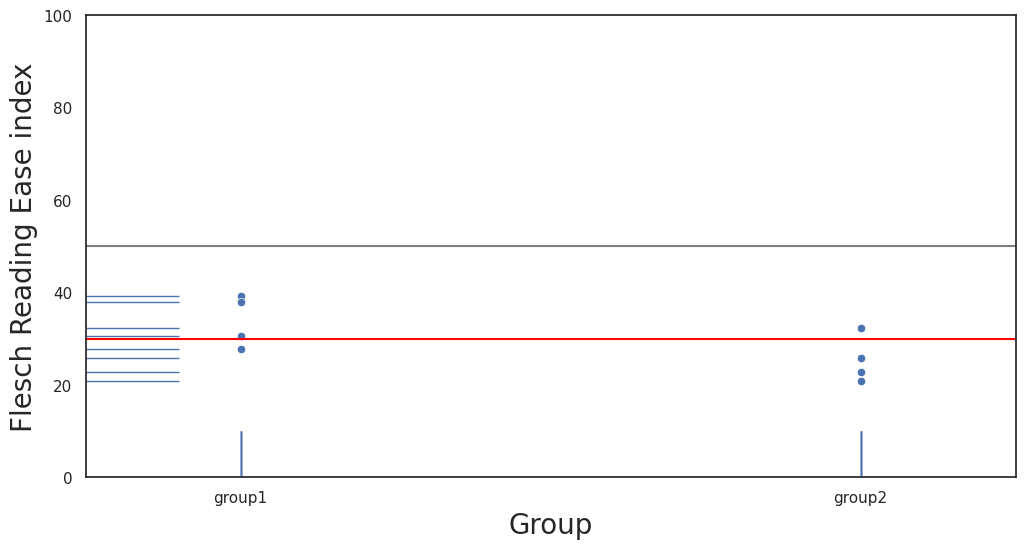

In [ ]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Group", y="FRE")
ax = sns.rugplot(data=df4, x="Group", y="FRE", height=.1)
ax.set_ylim([0,100])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Group', ylabel='Flesch Reading Ease index')
ax.axhline(50, color="gray")
ax.axhline(30, color="red")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FRE_bycategory.png')

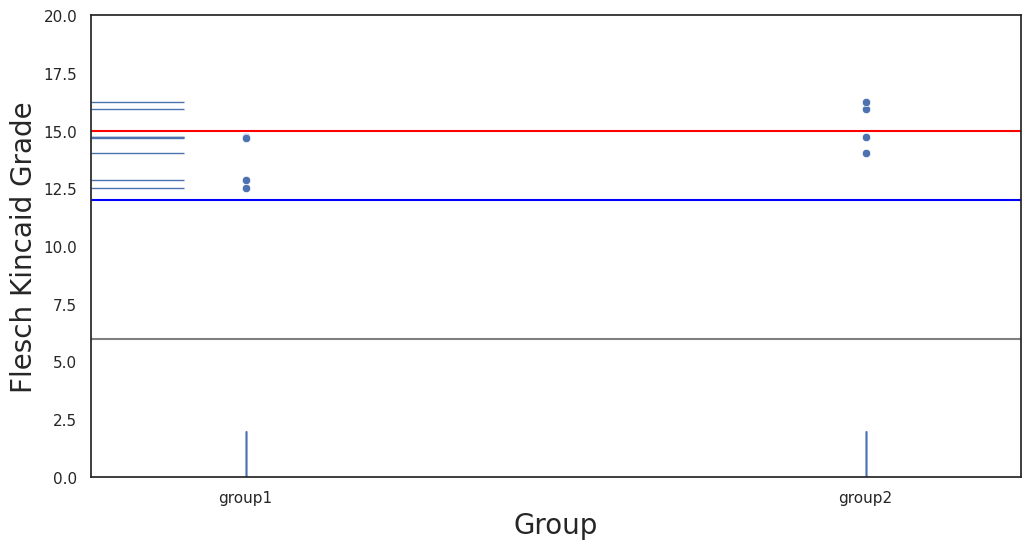

In [ ]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Group", y="FKG")
ax = sns.rugplot(data=df4, x="Group", y="FKG", height=.1)
ax.set_ylim([0,20])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Group', ylabel='Flesch Kincaid Grade')
ax.axhline(15, color="red")
ax.axhline(12, color="blue")
ax.axhline(6, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FKG_byGroup.png')

# <font color = 'red'> **Sentiment Analysis for Group1**

## **Bar Graph & Pie Chart for average across books in Family Narrative**

In [ ]:
import pandas as pd

# ▶️ Change this to your txt file name 🍎🍎🍎🍎🍎
txt_file = "/content/NLP_2025/Wikipedia/wiki_corpus_delimited_group1_CLEANED.txt"

# Read the text file
with open(txt_file, "r", encoding="utf-8") as f:
    text = f.read()

# Create a DataFrame
df = pd.DataFrame({"Text": [text]})

# Save as CSV (same name but .csv extension)
csv_file = txt_file.replace(".txt", ".csv")
df.to_csv(csv_file, index=False, encoding="utf-8")

print(f"Created CSV file: {csv_file}")

Created CSV file: /content/NLP_2025/Wikipedia/wiki_corpus_delimited_group1_CLEANED.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             Sentence  CompScore  PosFlag  \
0   texttitlegroup\nmarine life marine life sea li...     0.0000        0   
1   as of 2023 more than 242000 marine species hav...     0.0000        0   
2   an average of 2332 new species per year are be...     0.0000        0   
3   marine life is studied scientifically in both ...     0.0000        0   
4   by volume oceans provide about 90 of the livin...     0.2960        1   
5   the earliest known life forms evolved as anaer...     0.3182        1   
6   the great oxygenation event of the early prote...     0.6542        1   
7   complex life eventually arose out of marine eu...     0.0000        0   
8   this was followed in the early phanerozoic by ...     0.5984        1   
9   these marine life also expanded into fresh wat...     0.3182        1   
10  today marine species range in size from the mi...     0.5994        1   
11  marine microorganisms have been variously esti...     0.0000        0   

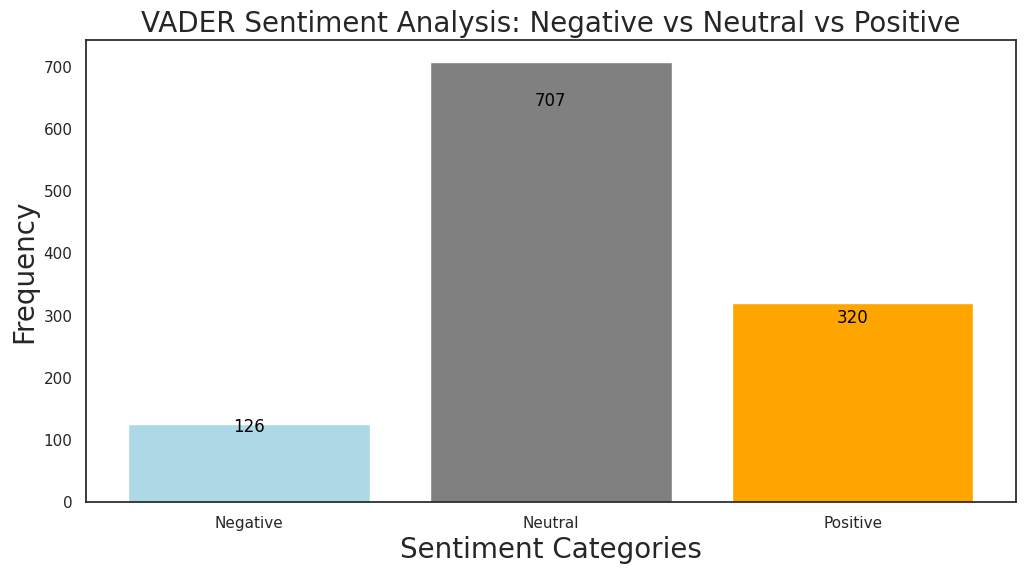

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------
# 1. Import libraries and download NLTK data
# ----------------------------------------------------------------------------------------------------------------------
import pandas as pd
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# ----------------------------------------------------------------------------------------------------------------------
# 2. Define the missing function: remove_punctuations()
# ----------------------------------------------------------------------------------------------------------------------
def remove_punctuations(text):
    if isinstance(text, str):
        return text.translate(str.maketrans("", "", string.punctuation))
    return text


# ----------------------------------------------------------------------------------------------------------------------
# 3. Load CSV file 🍎🍎🍎🍎🍎
# ----------------------------------------------------------------------------------------------------------------------
df = pd.read_csv('/content/NLP_2025/Wikipedia/wiki_corpus_delimited_group1_CLEANED.csv')


# ----------------------------------------------------------------------------------------------------------------------
# 4. Sentence tokenization → DataFrame
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = df['Text'].apply(sent_tokenize).explode().reset_index(drop=True)


# ----------------------------------------------------------------------------------------------------------------------
# 5. Clean punctuation + lowercase
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.apply(remove_punctuations).str.lower()


# ----------------------------------------------------------------------------------------------------------------------
# 6. Initialize VADER
# ----------------------------------------------------------------------------------------------------------------------
sid = SentimentIntensityAnalyzer()


# ----------------------------------------------------------------------------------------------------------------------
# 7. Define function to calculate compound score
# ----------------------------------------------------------------------------------------------------------------------
def calculate_compound_score(sentence):
    sentiment_scores = sid.polarity_scores(sentence)
    return sentiment_scores['compound']


# ----------------------------------------------------------------------------------------------------------------------
# 8. Calculate sentiment scores
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.to_frame(name="Sentence")
dfsentiment['CompScore'] = dfsentiment['Sentence'].apply(calculate_compound_score)


# ----------------------------------------------------------------------------------------------------------------------
# 9. Add sentiment flags
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment['PosFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if -0.05 < x < 0.05 else 0)


# ----------------------------------------------------------------------------------------------------------------------
# 10. Display output
# ----------------------------------------------------------------------------------------------------------------------
print(dfsentiment.head(20))


# ----------------------------------------------------------------------------------------------------------------------
# 11. Print frequency counts
# ----------------------------------------------------------------------------------------------------------------------
print('* Negative:', dfsentiment['NegFlag'].sum())
print('* Neutral :', dfsentiment['NeuFlag'].sum())
print('* Positive:', dfsentiment['PosFlag'].sum())
print("="*50)
print("Total sentences:", len(dfsentiment))


# ----------------------------------------------------------------------------------------------------------------------
# 12. Plot the graph
# ----------------------------------------------------------------------------------------------------------------------
Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

freqs = [Negative, Neutral, Positive]
labels = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(labels))

colors = ["lightblue", "gray", "orange"]

bars = plt.bar(x, freqs, color=colors)

plt.xticks(x, labels)
plt.xlabel("Sentiment Categories")
plt.ylabel("Frequency")
plt.title("VADER Sentiment Analysis: Negative vs Neutral vs Positive")

# Write numbers inside bars
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()*0.9,
             str(freq), ha='center', fontsize=12, color='black')

plt.show()

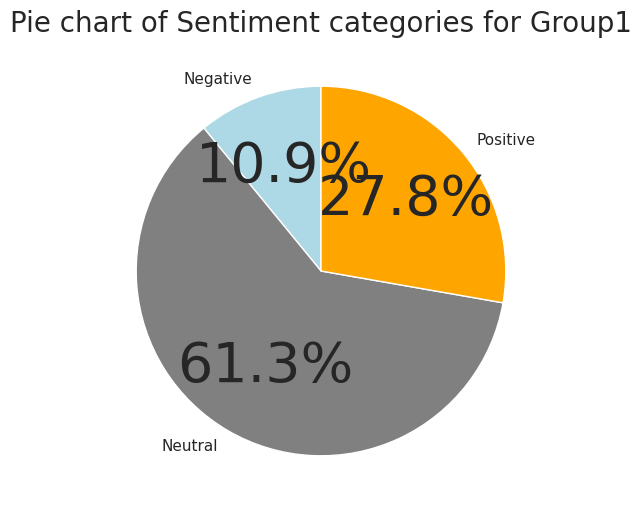

In [ ]:
# 감정분석 카테고리 파이차트 (비율확인용)
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories for Group1')

# Display the plot
plt.show()

#<font color = 'red'> **Sentiment analysis for Group2**

In [ ]:
import pandas as pd

# ▶️ Change this to your txt file name 🍎🍎🍎🍎🍎
txt_file = "/content/NLP_2025/Wikipedia/wiki_corpus_delimited_group2_CLEANED.txt"

# Read the text file
with open(txt_file, "r", encoding="utf-8") as f:
    text = f.read()

# Create a DataFrame
df = pd.DataFrame({"Text": [text]})

# Save as CSV (same name but .csv extension)
csv_file = txt_file.replace(".txt", ".csv")
df.to_csv(csv_file, index=False, encoding="utf-8")

print(f"Created CSV file: {csv_file}")

Created CSV file: /content/NLP_2025/Wikipedia/wiki_corpus_delimited_group2_CLEANED.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             Sentence  CompScore  PosFlag  \
0   texttitlegroup\nastronomy is a natural science...     0.3612        1   
1   it uses mathematics physics and chemistry to e...     0.0000        0   
2   objects of interest include planets moons star...     0.4588        1   
3   relevant phenomena include supernova explosion...     0.0000        0   
4   more generally astronomy studies everything th...     0.0000        0   
5   cosmology is the branch of astronomy that stud...     0.0000        0   
6     astronomy is one of the oldest natural sciences     0.3612        1   
7   the early civilizations in recorded history ma...     0.1531        1   
8   these include the egyptians babylonians greeks...     0.0000        0   
9   in the past astronomy included disciplines as ...     0.0000        0   
10  professional astronomy is split into observati...     0.0000        0   
11  observational astronomy is focused on acquirin...     0.3818        1   

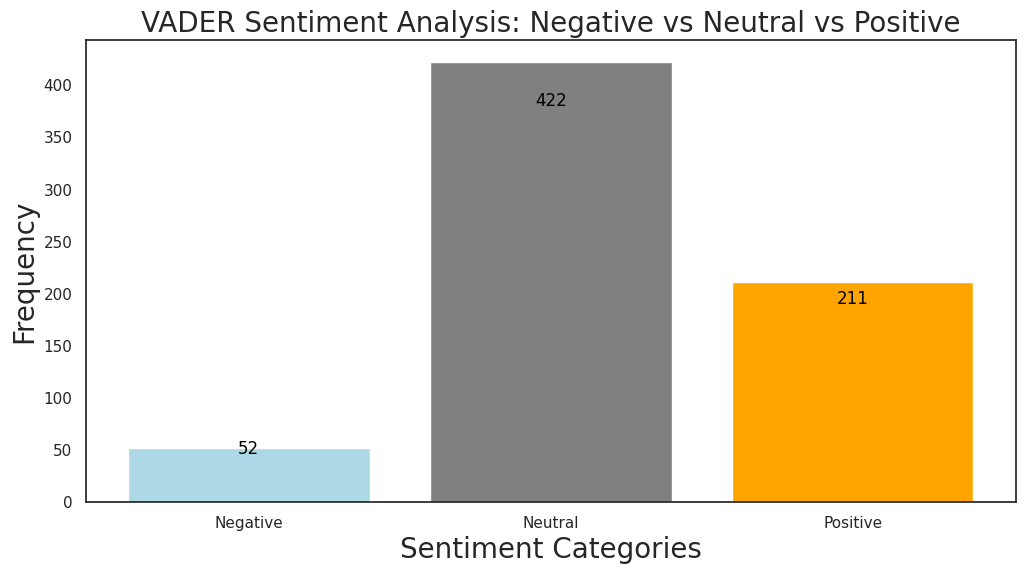

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------
# 1. Import libraries and download NLTK data
# ----------------------------------------------------------------------------------------------------------------------
import pandas as pd
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# ----------------------------------------------------------------------------------------------------------------------
# 2. Define the missing function: remove_punctuations()
# ----------------------------------------------------------------------------------------------------------------------
def remove_punctuations(text):
    if isinstance(text, str):
        return text.translate(str.maketrans("", "", string.punctuation))
    return text


# ----------------------------------------------------------------------------------------------------------------------
# 3. Load CSV file 🍎🍎🍎🍎🍎
# ----------------------------------------------------------------------------------------------------------------------
df = pd.read_csv('/content/NLP_2025/Wikipedia/wiki_corpus_delimited_group2_CLEANED.csv')


# ----------------------------------------------------------------------------------------------------------------------
# 4. Sentence tokenization → DataFrame
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = df['Text'].apply(sent_tokenize).explode().reset_index(drop=True)


# ----------------------------------------------------------------------------------------------------------------------
# 5. Clean punctuation + lowercase
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.apply(remove_punctuations).str.lower()


# ----------------------------------------------------------------------------------------------------------------------
# 6. Initialize VADER
# ----------------------------------------------------------------------------------------------------------------------
sid = SentimentIntensityAnalyzer()


# ----------------------------------------------------------------------------------------------------------------------
# 7. Define function to calculate compound score
# ----------------------------------------------------------------------------------------------------------------------
def calculate_compound_score(sentence):
    sentiment_scores = sid.polarity_scores(sentence)
    return sentiment_scores['compound']


# ----------------------------------------------------------------------------------------------------------------------
# 8. Calculate sentiment scores
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.to_frame(name="Sentence")
dfsentiment['CompScore'] = dfsentiment['Sentence'].apply(calculate_compound_score)


# ----------------------------------------------------------------------------------------------------------------------
# 9. Add sentiment flags
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment['PosFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if -0.05 < x < 0.05 else 0)


# ----------------------------------------------------------------------------------------------------------------------
# 10. Display output
# ----------------------------------------------------------------------------------------------------------------------
print(dfsentiment.head(20))


# ----------------------------------------------------------------------------------------------------------------------
# 11. Print frequency counts
# ----------------------------------------------------------------------------------------------------------------------
print('* Negative:', dfsentiment['NegFlag'].sum())
print('* Neutral :', dfsentiment['NeuFlag'].sum())
print('* Positive:', dfsentiment['PosFlag'].sum())
print("="*50)
print("Total sentences:", len(dfsentiment))


# ----------------------------------------------------------------------------------------------------------------------
# 12. Plot the graph
# ----------------------------------------------------------------------------------------------------------------------
Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

freqs = [Negative, Neutral, Positive]
labels = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(labels))

colors = ["lightblue", "gray", "orange"]

bars = plt.bar(x, freqs, color=colors)

plt.xticks(x, labels)
plt.xlabel("Sentiment Categories")
plt.ylabel("Frequency")
plt.title("VADER Sentiment Analysis: Negative vs Neutral vs Positive")

# Write numbers inside bars
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()*0.9,
             str(freq), ha='center', fontsize=12, color='black')

plt.show()

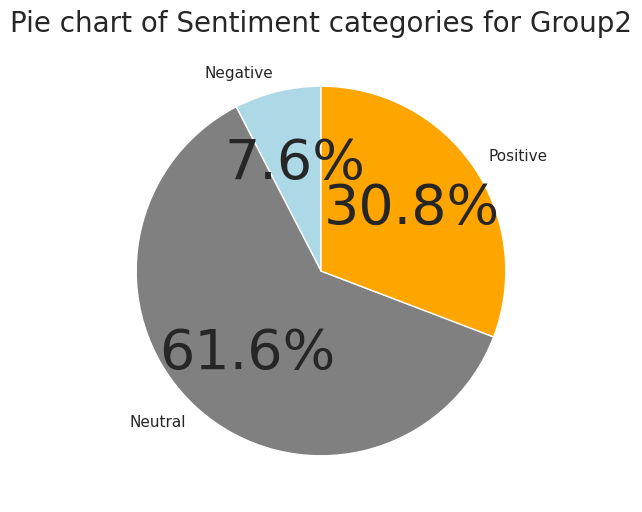

In [ ]:
# 감정분석 카테고리 파이차트 (비율확인용)
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories for Group2')

# Display the plot
plt.show()

semantic similarity for group1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 46.2 MB/s eta 0:00:00


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


✅ Generating Adaptive Semantic Network...
✅ Network graph saved to: /content/NLP_2025/Wikipedia/Adaptive Semantic Similarity Network (Word-Level for Group1)


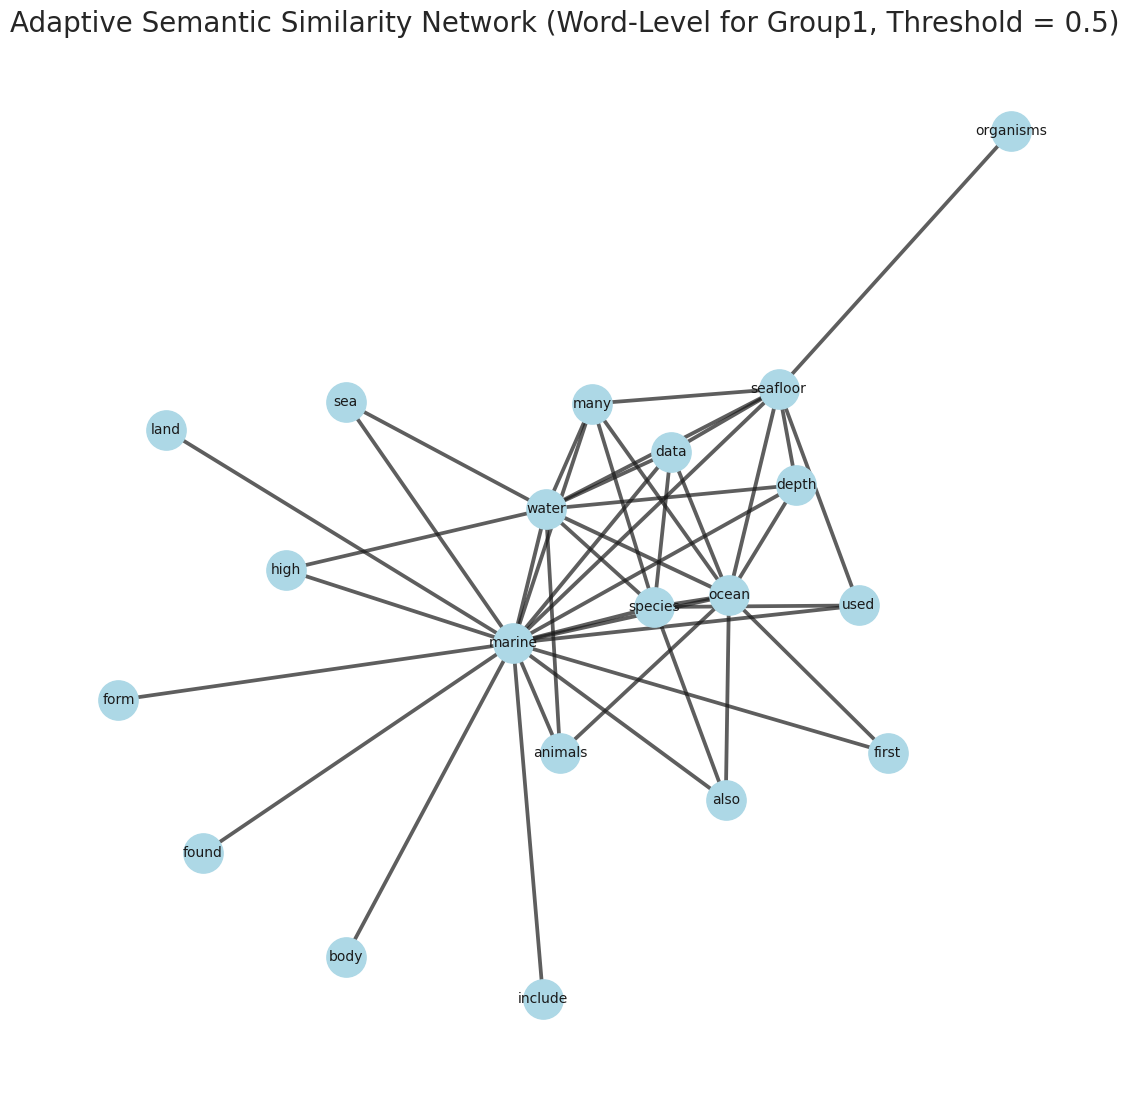

✅ Generating PCA Plot...
✅ PCA plot saved to: /content/NLP_2025/Wikipedia/PCA of Word Embeddings for Group1.png


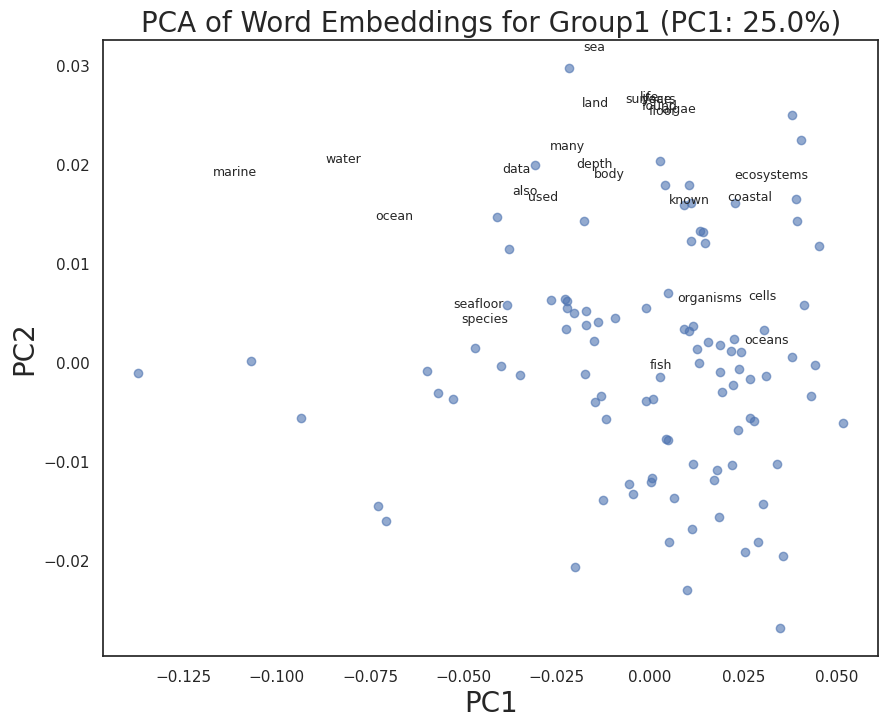

✅ Generating t-SNE Plot...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


✅ t-SNE plot saved to: /content/NLP_2025/Wikipedia/t-SNE of Word Embeddings for Group1.png


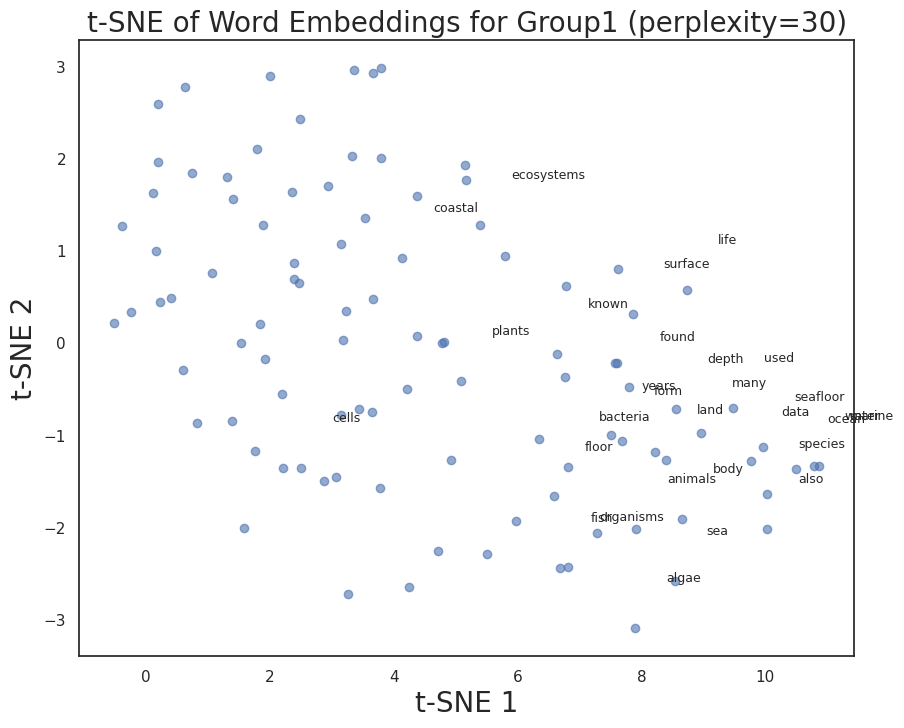

In [ ]:
# !pip install gensim nltk scikit-learn matplotlib pandas networkx
!pip install gensim
!pip install nltk

# Standard POS tagger
nltk.download("averaged_perceptron_tagger")

# Newer English-only POS tagger required in some NLTK versions
nltk.download("averaged_perceptron_tagger_eng")

import os
import pandas as pd
import nltk
import string
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# --- Utility ---
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return None

def load_texts(file_path, text_column='text'):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip().str.lower()
    col = text_column.lower()
    texts = df[col].dropna().astype(str).tolist()
    return texts

def preprocess(texts):
    stop_words = set(stopwords.words('english'))
    sentences = []
    for text in texts:
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = pos_tag(tokens)
        filtered = [w for w, p in pos_tags if w.isalpha() and w not in stop_words and get_wordnet_pos(p)]
        if filtered:
            sentences.append(filtered)
    return sentences

# --- Train Word2Vec ---
def train_w2v(sentences, vector_size=100):
    return Word2Vec(sentences, vector_size=vector_size, window=5, min_count=2, workers=4, seed=42)

# --- Adaptive semantic network ---
def adaptive_network(model, save_dir, max_edges=60):
    words = list(model.wv.index_to_key)
    pairs = []
    for w in words[:200]:
        for sw, sim in model.wv.most_similar(w, topn=5):
            pairs.append((w, sw, sim))
    pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    pairs = pairs[:max_edges]

    G = nx.Graph()
    for a, b, s in pairs:
        G.add_edge(a, b, weight=s)

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=80, seed=42)
    weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
    nx.draw_networkx_edges(G, pos, width=[3*w for w in weights], alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Adaptive Semantic Similarity Network (Word-Level for Group1, Threshold = 0.5)")
    plt.axis('off')
    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(save_dir, "Adaptive Semantic Similarity Network (Word-Level for Group1)")
    plt.savefig(save_path, dpi=300)
    print(f"✅ Network graph saved to: {save_path}")
    plt.show()

# --- PCA Visualization ---
def plot_pca(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_pca[i,0]+0.02, X_pca[i,1]+0.02), fontsize=9)
    plt.title(f"PCA of Word Embeddings for Group1 (PC1: {pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    # Save the figure
    save_path = os.path.join(save_dir, "PCA of Word Embeddings for Group1.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ PCA plot saved to: {save_path}")
    plt.show()

# --- t-SNE Visualization ---
def plot_tsne(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    perp = min(30, (len(words) - 1) // 3)
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_tsne[i,0]+0.5, X_tsne[i,1]+0.5), fontsize=9)
    plt.title(f"t-SNE of Word Embeddings for Group1 (perplexity={perp})")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")

    # Save the figure
    save_path = os.path.join(save_dir, "t-SNE of Word Embeddings for Group1.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ t-SNE plot saved to: {save_path}")
    plt.show()

# --- Main --- 🍎🍎🍎🍎🍎
def main():
    file_path = "/content/NLP_2025/Wikipedia/wiki_corpus_delimited_group1_CLEANED.csv"
    text_column = "Text"
    save_dir = os.path.dirname(file_path)

    texts = load_texts(file_path, text_column)
    sentences = preprocess(texts)
    model = train_w2v(sentences)

    print("✅ Generating Adaptive Semantic Network...")
    adaptive_network(model, save_dir, max_edges=60)

    print("✅ Generating PCA Plot...")
    plot_pca(model, save_dir, top_n=100, label_n=30)

    print("✅ Generating t-SNE Plot...")
    plot_tsne(model, save_dir, top_n=100, label_n=30)

if __name__ == "__main__":
    main()

semantic similarity for group2

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Generating Adaptive Semantic Network...
✅ Network graph saved to: /content/NLP_2025/Wikipedia/Adaptive Semantic Similarity Network (Word-Level for Group2)


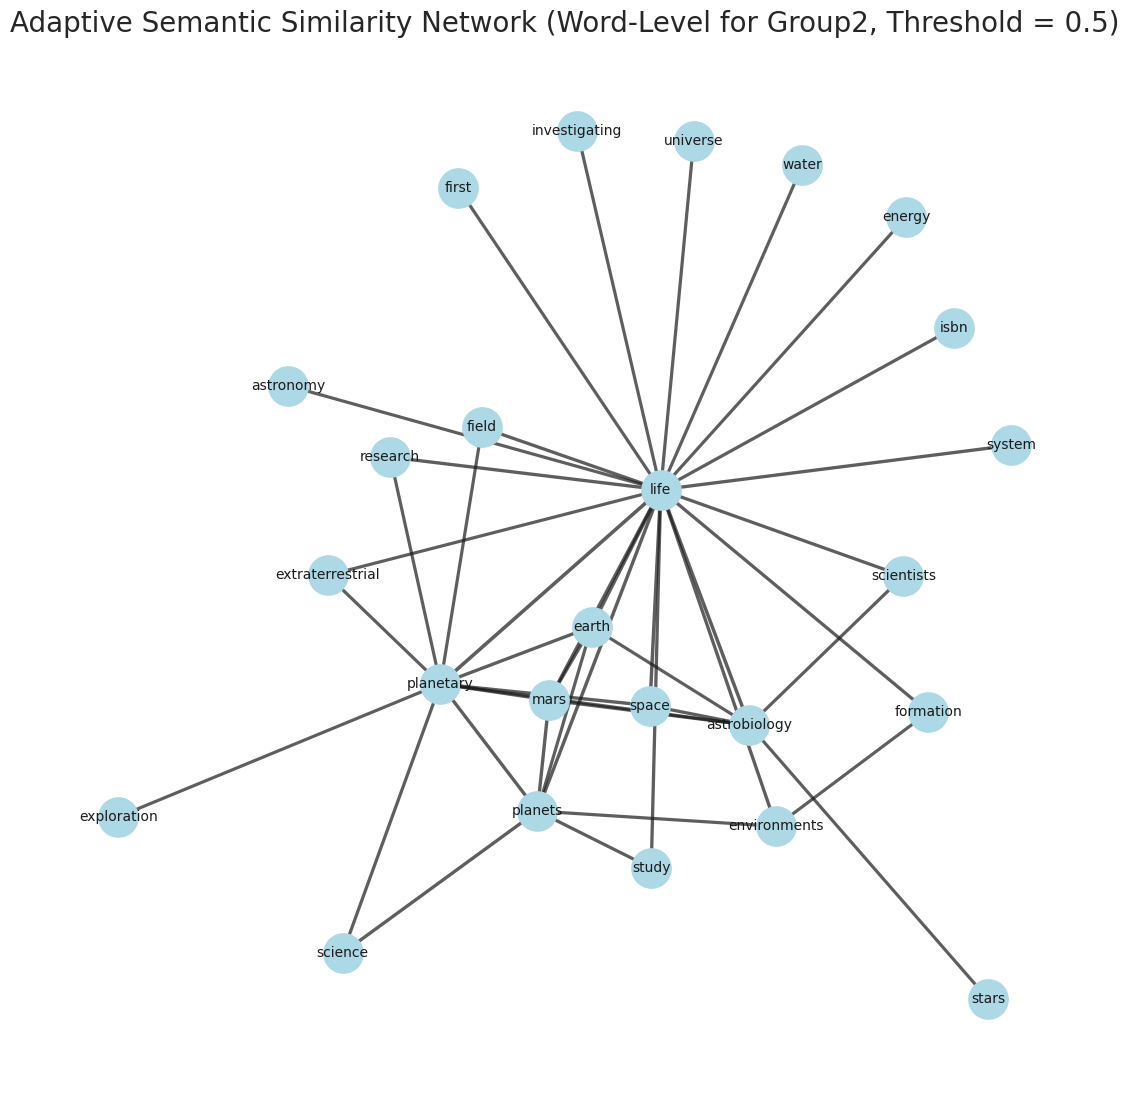

✅ Generating PCA Plot...
✅ PCA plot saved to: /content/NLP_2025/Wikipedia/PCA of Word Embeddings for Group2.png


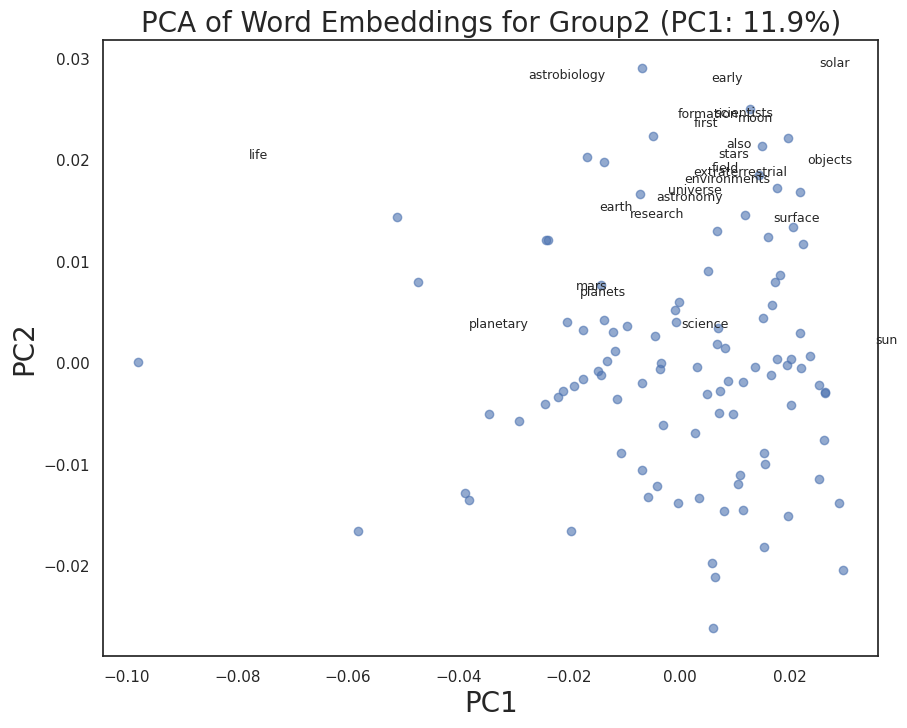

✅ Generating t-SNE Plot...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


✅ t-SNE plot saved to: /content/NLP_2025/Wikipedia/t-SNE of Word Embeddings for Group2.png


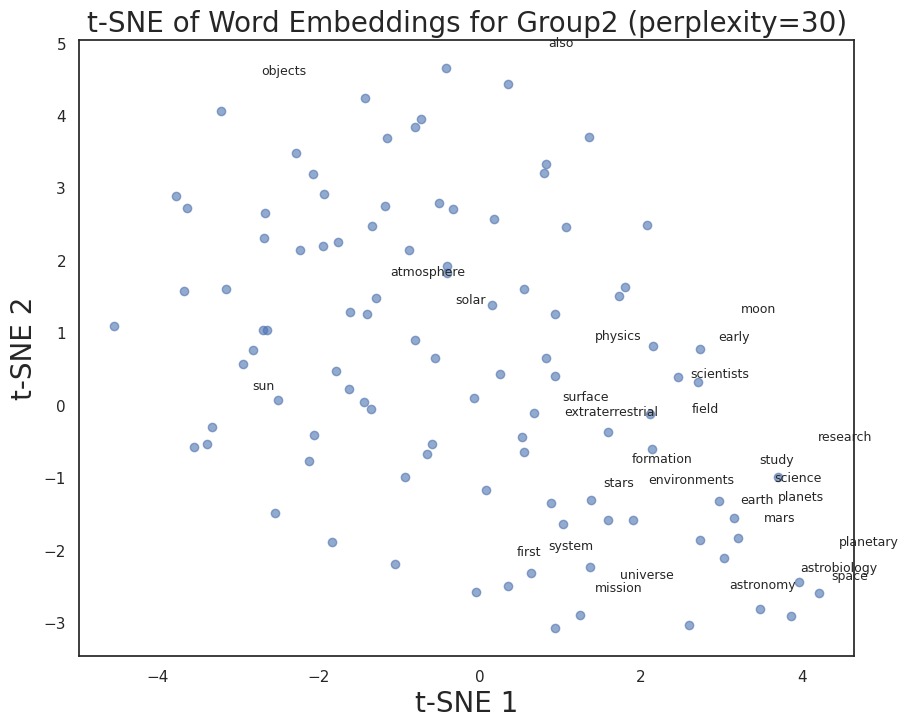

In [ ]:
# !pip install gensim nltk scikit-learn matplotlib pandas networkx
!pip install gensim
!pip install nltk

# Standard POS tagger
nltk.download("averaged_perceptron_tagger")

# Newer English-only POS tagger required in some NLTK versions
nltk.download("averaged_perceptron_tagger_eng")

import os
import pandas as pd
import nltk
import string
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# --- Utility ---
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return None

def load_texts(file_path, text_column='text'):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip().str.lower()
    col = text_column.lower()
    texts = df[col].dropna().astype(str).tolist()
    return texts

def preprocess(texts):
    stop_words = set(stopwords.words('english'))
    sentences = []
    for text in texts:
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = pos_tag(tokens)
        filtered = [w for w, p in pos_tags if w.isalpha() and w not in stop_words and get_wordnet_pos(p)]
        if filtered:
            sentences.append(filtered)
    return sentences

# --- Train Word2Vec ---
def train_w2v(sentences, vector_size=100):
    return Word2Vec(sentences, vector_size=vector_size, window=5, min_count=2, workers=4, seed=42)

# --- Adaptive semantic network ---
def adaptive_network(model, save_dir, max_edges=60):
    words = list(model.wv.index_to_key)
    pairs = []
    for w in words[:200]:
        for sw, sim in model.wv.most_similar(w, topn=5):
            pairs.append((w, sw, sim))
    pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    pairs = pairs[:max_edges]

    G = nx.Graph()
    for a, b, s in pairs:
        G.add_edge(a, b, weight=s)

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=80, seed=42)
    weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
    nx.draw_networkx_edges(G, pos, width=[3*w for w in weights], alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Adaptive Semantic Similarity Network (Word-Level for Group2, Threshold = 0.5)")
    plt.axis('off')
    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(save_dir, "Adaptive Semantic Similarity Network (Word-Level for Group2)")
    plt.savefig(save_path, dpi=300)
    print(f"✅ Network graph saved to: {save_path}")
    plt.show()

# --- PCA Visualization ---
def plot_pca(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_pca[i,0]+0.02, X_pca[i,1]+0.02), fontsize=9)
    plt.title(f"PCA of Word Embeddings for Group2 (PC1: {pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    # Save the figure
    save_path = os.path.join(save_dir, "PCA of Word Embeddings for Group2.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ PCA plot saved to: {save_path}")
    plt.show()

# --- t-SNE Visualization ---
def plot_tsne(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    perp = min(30, (len(words) - 1) // 3)
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_tsne[i,0]+0.5, X_tsne[i,1]+0.5), fontsize=9)
    plt.title(f"t-SNE of Word Embeddings for Group2 (perplexity={perp})")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")

    # Save the figure
    save_path = os.path.join(save_dir, "t-SNE of Word Embeddings for Group2.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ t-SNE plot saved to: {save_path}")
    plt.show()

# --- Main ---
def main():
    # Correct the file path to match the existing CSV file
    file_path = "/content/NLP_2025/Wikipedia/wiki_corpus_delimited_group2_CLEANED.csv"
    text_column = "Text"
    save_dir = os.path.dirname(file_path)

    texts = load_texts(file_path, text_column)
    sentences = preprocess(texts)
    model = train_w2v(sentences)

    print("✅ Generating Adaptive Semantic Network...")
    adaptive_network(model, save_dir, max_edges=60)

    print("✅ Generating PCA Plot...")
    plot_pca(model, save_dir, top_n=100, label_n=30)

    print("✅ Generating t-SNE Plot...")
    plot_tsne(model, save_dir, top_n=100, label_n=30)

if __name__ == "__main__":
    main()

###🐹🐾 **2️⃣ Clone a repository on your github (Beware that the following code uses your instructor's github repository**

In [ ]:
!git clone 'https://github.com/eunoiabout/NLP_2025'

Cloning into 'NLP_2025'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 1.74 MiB | 4.63 MiB/s, done.
Resolving deltas: 100% (6/6), done.
